# Метрическая классификация. Метод ближайших соседей и его развитие
# Практическая работа

## Цели практической работы
Научиться:
- строить модель методом ближайших соседей на реальных данных;
- правильно определять качество работы модели.


## Что входит в практическую работу


- Загрузить данные и ознакомиться с ними.
- Изучить данные и провести анализ.
- Разделить данные на обучающую и тестовую выборки.
- Реализовать построение модели с помощью  библиотеки Scikit-learn.
- Подобрать оптимальное число ближайших соседей методом leave-one-out.
- Получить качество модели с помощью F-меры и матрицы сопряжённости.

## Что оценивается

1. Выполнение всех этапов работы.
2. Наличие вывода по результатам.
3. Непереобученность модели.
4. Качество модели.


**Как отправить работу на проверку?**

1. Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачу. 
2. Сохраните изменения при помощи опции Save and Checkpoint из вкладки File или кнопки Save and Checkpoint на панели инструментов. 
3. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.




# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите дамп базы в Postgres. 
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности. 


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

1. Изучите состав БД с помощью инструмента отрисовки ERD-диаграмм (Entity Relationship diagram отображает все сущности БД, а также визуализирует связность таблиц). Соберите датасет следующей структуры из данных, имеющихся в базе:

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

2. Постройте модель зависимости TARGET от остальных параметров получившейся таблицы методом ближайших соседей.

3. Получите качество модели с помощью F-меры и матрицы сопряжённости.

Что нужно сделать после сбора таблицы:

In [29]:
import psycopg2 as pg
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from scipy.spatial import distance
import operator
import collections


In [ ]:
conn = pg.connect(
    dbname='Module_6', user = 'postgres', password = 'Eminem-91', host = 'localhost'
    )
cursor = conn.cursor()

In [ ]:
cursor.execute('''
               SELECT table_name
               FROM information_schema.tables
               WHERE table_schema='public'
               AND table_type='BASE TABLE';
               ''')
cursor.fetchall()

[('d_work',),
 ('d_clients',),
 ('d_agreement',),
 ('d_last_credit',),
 ('d_job',),
 ('d_loan',),
 ('d_close_loan',),
 ('d_salary',),
 ('d_pens',)]

In [ ]:
query = '''
    select agr.agreement_rk,
           agr.target,
           cl.age,
           cl.socstatus_work_fl,
           cl.socstatus_pens_fl,
           cl.gender,
           cl.child_total,
           cl.dependants,
           d_salary.personal_income,
           count(d_loan.id_loan) as loan_num_total,
           count(d_close_loan.closed_fl) as loan_num_closed
    from d_agreement as agr
    left join d_clients as cl
    on agr.id_client = cl.id
    left join d_salary
    on cl.id = d_salary.id_client 
    left join d_loan
    on cl.id = d_loan.id_client
    left join d_close_loan
    on d_loan.id_loan = d_close_loan.id_loan
    and d_close_loan.closed_fl = 1
    group by agr.agreement_rk,
           agr.target,
           cl.age,
           cl.socstatus_work_fl,
           cl.socstatus_pens_fl,
           cl.gender,
           cl.child_total,
           cl.dependants,
           d_salary.personal_income;
'''

In [ ]:
df = pd.read_sql(query, conn)
df

In [ ]:
df.to_csv('data.csv', index= False )


In [81]:
df = pd.read_csv('data.csv', low_memory=False)
df.shape

(15223, 11)

In [82]:
#Проверяет датасет на дубликаты(по ID визита), их не оказалось.
duplicateRows = df[df.duplicated (['target',
 'age',
 'socstatus_work_fl',
 'socstatus_pens_fl',
 'gender',
 'child_total',
 'dependants',
 'personal_income',
 'loan_num_total',
 'loan_num_closed'])]
duplicateRows

,agreement_rk,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,personal_income,loan_num_total,loan_num_closed
133,62141110.0,0.0,48.0,2.0,1.0,1.0,2.0,0.0,10000.0,1,0
324,64442372.0,0.0,42.0,2.0,1.0,1.0,0.0,0.0,15000.0,1,0
353,66083735.0,0.0,26.0,2.0,1.0,1.0,0.0,0.0,15000.0,2,2
445,64334918.0,0.0,24.0,2.0,1.0,0.0,0.0,0.0,25000.0,1,0
490,63008942.0,0.0,38.0,2.0,1.0,1.0,1.0,1.0,12000.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
15209,66975225.0,0.0,30.0,2.0,1.0,1.0,1.0,1.0,10000.0,1,0
15214,64570073.0,0.0,22.0,2.0,1.0,0.0,0.0,0.0,12000.0,1,0
15217,60387646.0,0.0,54.0,2.0,1.0,0.0,2.0,0.0,8000.0,1,0
15220,62026630.0,0.0,33.0,2.0,1.0,1.0,1.0,1.0,8000.0,1,0


In [84]:
#Удаляем дубликаты
df = df[~df.duplicated (['target',
 'age',
 'socstatus_work_fl',
 'socstatus_pens_fl',
 'gender',
 'child_total',
 'dependants',
 'personal_income',
 'loan_num_total',
 'loan_num_closed'
 ])]
df

,agreement_rk,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,personal_income,loan_num_total,loan_num_closed
0,66407074.0,1.0,22.0,2.0,1.0,1.0,0.0,0.0,15000.0,1,1
1,61434460.0,0.0,41.0,2.0,1.0,0.0,0.0,0.0,16000.0,2,1
2,74948122.0,1.0,32.0,2.0,1.0,1.0,1.0,1.0,7000.0,2,1
3,61925439.0,0.0,59.0,1.0,2.0,1.0,0.0,0.0,6500.0,1,1
4,61140629.0,0.0,56.0,1.0,2.0,1.0,1.0,0.0,7000.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
15215,64835841.0,0.0,50.0,2.0,1.0,0.0,3.0,3.0,15000.0,1,0
15216,66924436.0,0.0,29.0,2.0,1.0,0.0,2.0,2.0,20000.0,1,0
15218,60380003.0,0.0,57.0,1.0,2.0,1.0,0.0,0.0,18000.0,1,0
15219,66419740.0,0.0,30.0,2.0,1.0,1.0,1.0,1.0,5300.0,3,3


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12001 entries, 0 to 15221
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   agreement_rk       12001 non-null  float64
 1   target             12001 non-null  float64
 2   age                12001 non-null  float64
 3   socstatus_work_fl  12001 non-null  float64
 4   socstatus_pens_fl  12001 non-null  float64
 5   gender             12001 non-null  float64
 6   child_total        12001 non-null  float64
 7   dependants         12001 non-null  float64
 8   personal_income    12001 non-null  float64
 9   loan_num_total     12001 non-null  int64  
 10  loan_num_closed    12001 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.1 MB


In [35]:
# Ищем процент незаполненных значений в каждом столбце
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending = False)
print('Процент пропущенных значений:\n', missing_values)

Процент пропущенных значений:
 agreement_rk         0.0
target               0.0
age                  0.0
socstatus_work_fl    0.0
socstatus_pens_fl    0.0
gender               0.0
child_total          0.0
dependants           0.0
personal_income      0.0
loan_num_total       0.0
loan_num_closed      0.0
dtype: float64


In [36]:
#Находим количество уникальных занчений в каждом столбце
for i in df.columns:
    print(
f"""Характеристика: {i} 
Количество уникальных значений: {df[i].nunique()} 
Список значений:
{df[i].value_counts()}
""")

Характеристика: agreement_rk 
Количество уникальных значений: 12001 
Список значений:
agreement_rk
66407074.0    1
64589070.0    1
74015143.0    1
66703166.0    1
74464695.0    1
             ..
63982619.0    1
65213933.0    1
61415603.0    1
66336048.0    1
64554791.0    1
Name: count, Length: 12001, dtype: int64

Характеристика: target 
Количество уникальных значений: 2 
Список значений:
target
0.0    10328
1.0     1673
Name: count, dtype: int64

Характеристика: age 
Количество уникальных значений: 47 
Список значений:
age
33.0    350
38.0    346
30.0    343
40.0    337
35.0    335
34.0    333
39.0    331
32.0    330
37.0    329
27.0    328
31.0    322
41.0    316
42.0    315
26.0    311
29.0    308
44.0    308
45.0    307
53.0    304
36.0    302
56.0    302
50.0    296
52.0    295
25.0    295
51.0    291
43.0    288
49.0    287
48.0    286
28.0    286
47.0    273
46.0    258
57.0    258
54.0    256
55.0    252
58.0    245
24.0    239
23.0    232
59.0    202
61.0    193
60.0    192
2

In [ ]:
# проведите анализ данных, посмотрите на индивидуальные графики
# зависимости целевой функции и отдельной переменной
# создайте дополнительные переменные
# сделайте предварительные выводы

# Ваш код здесь

In [85]:
q25 = df.personal_income.quantile(0.25)
q50 = df.personal_income.quantile(0.50)
q75 = df.personal_income.quantile(0.75)
print(q25, q50, q75)

8000.0 12000.0 17000.0


In [86]:
#Преобразуем значения socstatus_work_fl, socstatus_pens_fl в формат 1\0.
#Считаем количество действующих кредитов
#уровень дохода(низкий - 0(до 8000), средний - 1(8001-12000), выше среднего - 2(12001 - 17000),  высокий - 3(>17000))
#средний доход на клиента с иждивенцами
df['socstatus_work_fl'] = df.apply(lambda x: 1 if x.socstatus_work_fl == 2 else 0, axis=1)
df['socstatus_pens_fl'] = df.apply(lambda x: 1 if x.socstatus_pens_fl == 2 else 0, axis=1)
df['loan_num_active'] = df.apply(lambda x: x.loan_num_total - x.loan_num_closed, axis=1)
df['income_per_person'] = df.apply(lambda x: x.personal_income / (x.dependants + 1), axis=1)
df['income_level'] = df['personal_income'].apply(lambda x: 0  if x < 8000 
                                                   else (1 if x in range (8001, 12001) 
                                                   else (2 if x in range (12001, 17001)
                                                   else (3))))
df.head()

,agreement_rk,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,personal_income,loan_num_total,loan_num_closed,loan_num_active,loan_per_person,income_level
0,66407074.0,1.0,22.0,1,0,1.0,0.0,0.0,15000.0,1,1,0.0,15000.0,2
1,61434460.0,0.0,41.0,1,0,0.0,0.0,0.0,16000.0,2,1,1.0,16000.0,2
2,74948122.0,1.0,32.0,1,0,1.0,1.0,1.0,7000.0,2,1,1.0,3500.0,0
3,61925439.0,0.0,59.0,0,1,1.0,0.0,0.0,6500.0,1,1,0.0,6500.0,0
4,61140629.0,0.0,56.0,0,1,1.0,1.0,0.0,7000.0,1,0,1.0,7000.0,0


<Axes: >

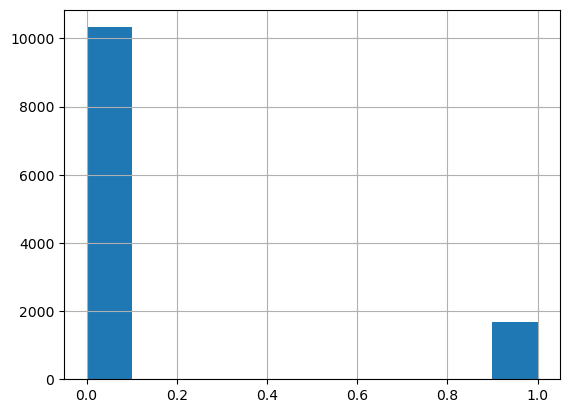

In [87]:
df['target'].hist()#можем видеть, что выборка не сбалансирована, целевого действия намного меньше

In [88]:
one = (len(df[df['target']== 1]) / len(df)) * 100
zero = (len(df[df['target']== 0]) / len(df)) * 100
print('Процент целевых событий(1):\n', round(one, 3) , 
      '\nПроцент НЕ целевых событий(0):\n', round(zero, 3))

Процент целевых событий(1):
 13.941 
Процент НЕ целевых событий(0):
 86.059


<Axes: >

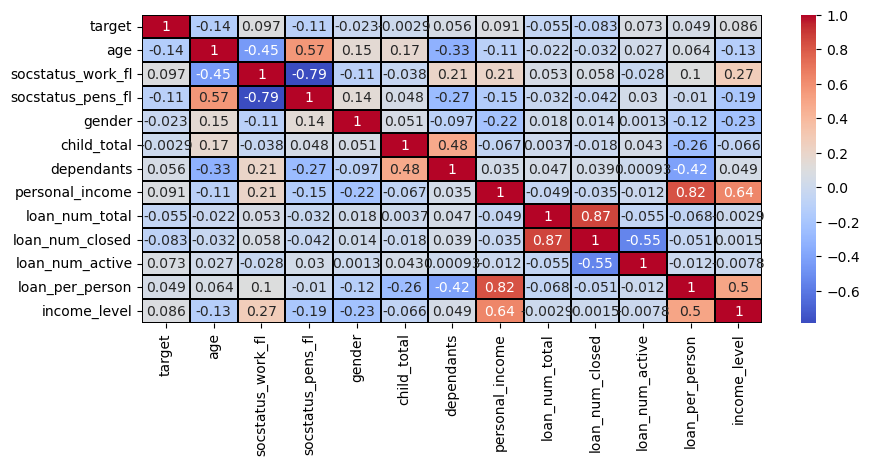

In [89]:
plt.figure(figsize=(10, 4))

sns.heatmap(df[['target',
 'age',
 'socstatus_work_fl',
 'socstatus_pens_fl',
 'gender',
 'child_total',
 'dependants',
 'personal_income',
 'loan_num_total',
 'loan_num_closed',
 'loan_num_active',
 'loan_per_person',
 'income_level']].corr(), annot = True,cmap= 'coolwarm', linewidths=0.1, linecolor='black')

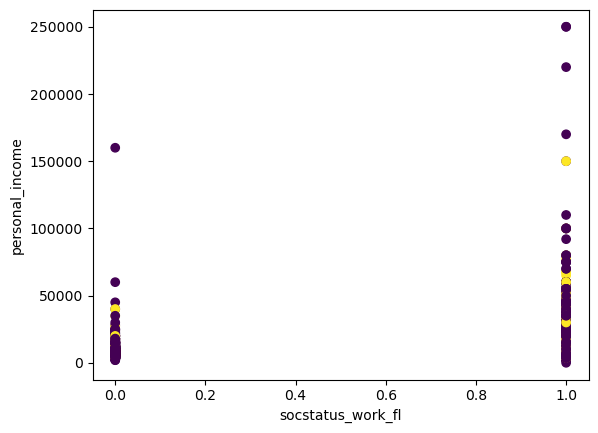

In [42]:
#распределение target по признакам с наибольшик к-том корреляции
plt.scatter(df['socstatus_work_fl'], df['personal_income'], c=df['target'])
plt.xlabel('socstatus_work_fl')
plt.ylabel('personal_income')
plt.show()

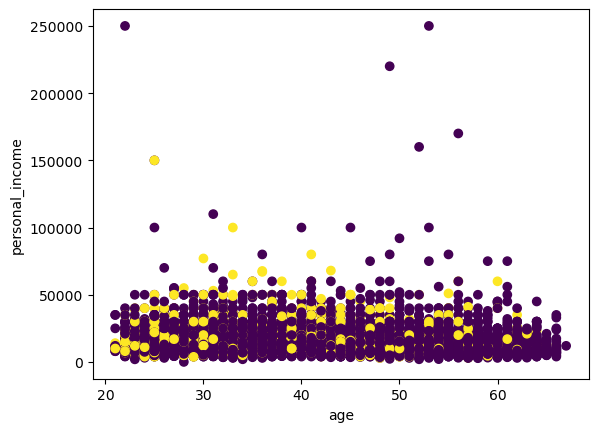

In [90]:
#распределение target по признакам с наибольшик к-том корреляции
plt.scatter(df['age'], df['personal_income'], c=df['target'])
plt.xlabel('age')
plt.ylabel('personal_income')
plt.show()

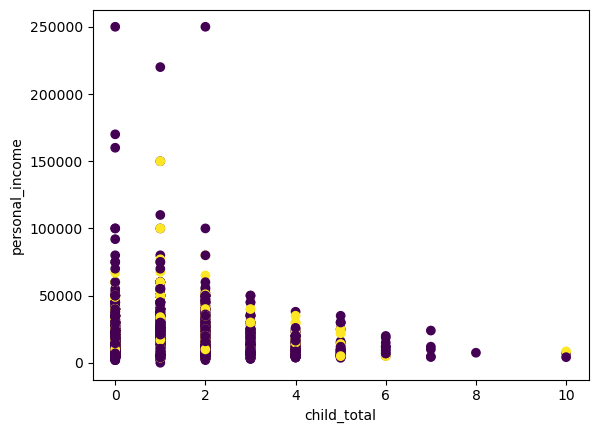

In [91]:
#распределение target по признакам с наибольшик к-том корреляции
plt.scatter(df['child_total'], df['personal_income'], c=df['target'])
plt.xlabel('child_total')
plt.ylabel('personal_income')
plt.show()


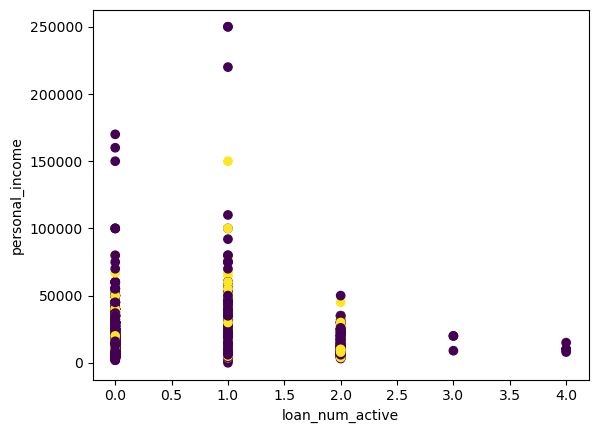

In [92]:
#распределение target по признакам с наибольшик к-том корреляции
plt.scatter(df['loan_num_active'], df['personal_income'], c=df['target'])
plt.xlabel('loan_num_active')
plt.ylabel('personal_income')
plt.show()

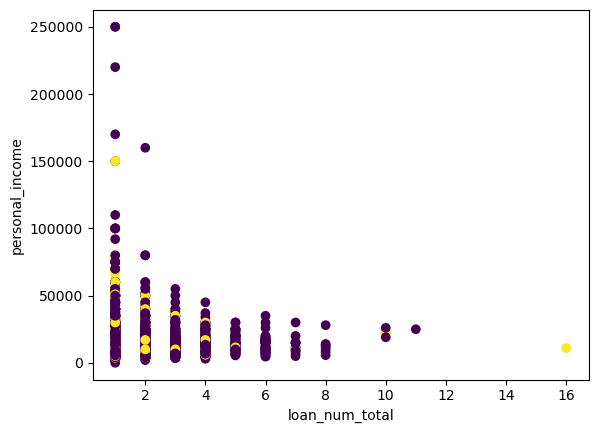

In [93]:
#распределение target по признакам с наибольшик к-том корреляции
plt.scatter(df['loan_num_total'], df['personal_income'], c=df['target'])
plt.xlabel('loan_num_total')
plt.ylabel('personal_income')
plt.show()

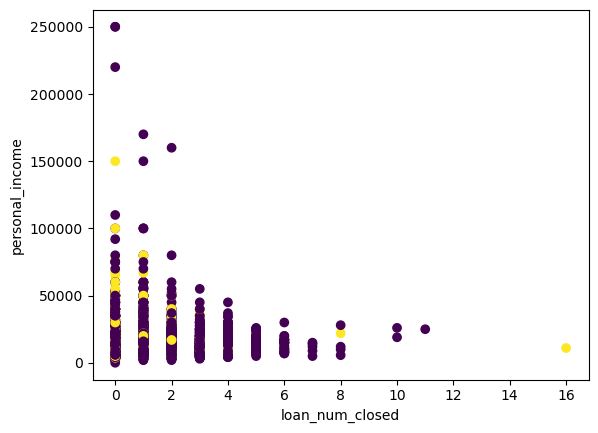

In [94]:
#распределение target по признакам с наибольшик к-том корреляции
plt.scatter(df['loan_num_closed'], df['personal_income'], c=df['target'])
plt.xlabel('loan_num_closed')
plt.ylabel('personal_income')
plt.show()

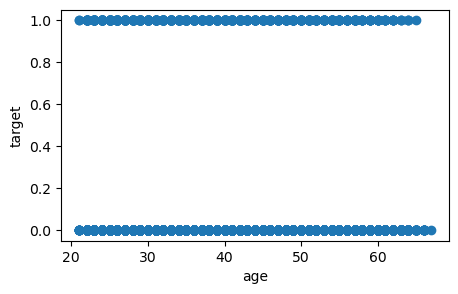

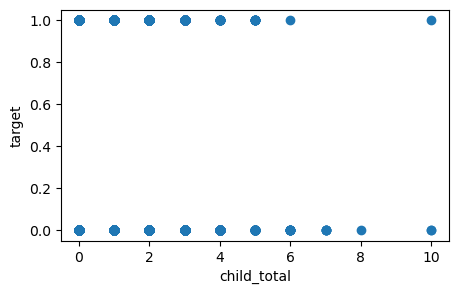

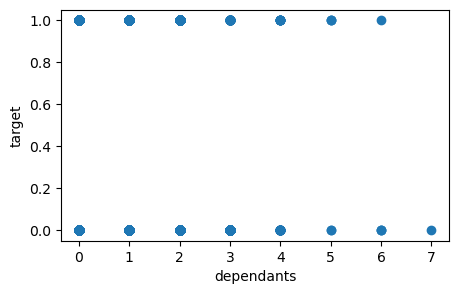

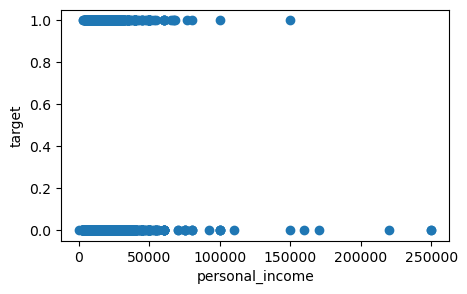

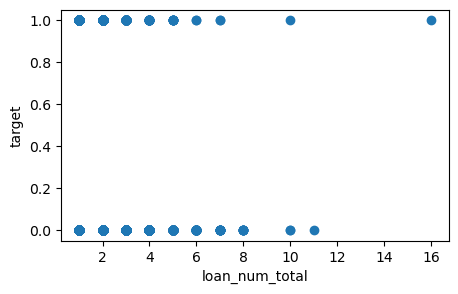

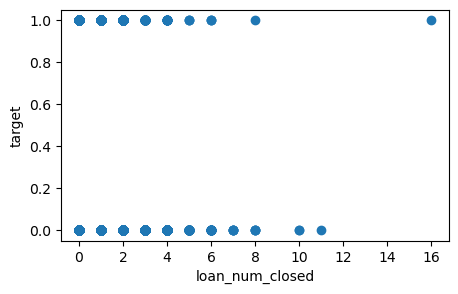

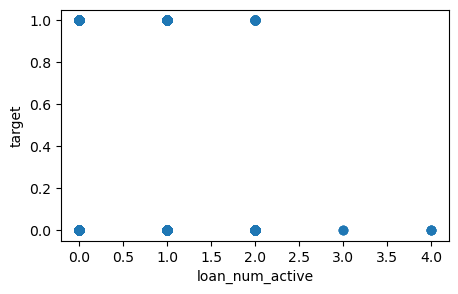

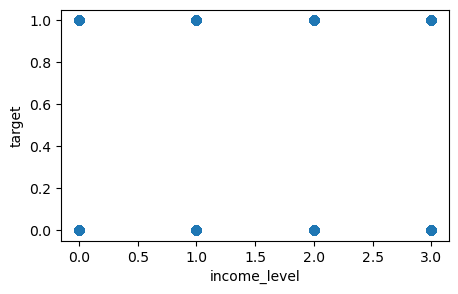

In [43]:
for i in ['age', 
 'child_total',
 'dependants',
 'personal_income',
 'loan_num_total',
 'loan_num_closed',
 'loan_num_active',
 'income_level']:
    plt.figure(figsize=(5, 3))
    plt.scatter(x=df[i],y=df['target'])
    plt.xlabel(i)
    plt.ylabel("target")
    plt.show()

# Вывод

Выборка несбалансирована, так как целевое действие составляет около 13%.
Целевая переменная Target имеет очень слабую корреляцию с признаками(все к-ты < 0,1), на графиках так же не видно отсутствие линейной зависимости.
Графики распределение целевой переменной по парам признаков тоже не дают выявить какую-либо закономерность.
Разве, что клиентам с 3 и более активными кредитами предложения практически не поступали, а на те что поступили, клиенты не откликнулись.
У работающих клиентов выше доходы, им сделали больше предложений и получили больше откликов.
Что касается Возраста и Дохода, то там целевая переменная распределена практически равномерно.

In [44]:
def remove_outliers(df):
    num_cols = ['personal_income']
    for col in num_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = remove_outliers(df)
df.shape

(11537, 14)

In [45]:
# раздедлите на обучающую и тестовую выборки

x = df.drop(['target', 'agreement_rk' ], axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.7, random_state=123
)

In [46]:
# обучите модель методом ближайших соседей
score_list = []
for k in range(1, 50, 2):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)

  score_train = knn.score(x_train, y_train)
  score_test = knn.score(x_test, y_test)

  score_list.append([k, score_train, score_test])

In [47]:
score_df = pd.DataFrame(score_list, columns= ['k', 'score_train', 'score_test'])
score_df

,k,score_train,score_test
0,1,0.962477,0.744656
1,3,0.881115,0.816869
2,5,0.871207,0.841999
3,7,0.867616,0.853842
4,9,0.866625,0.859330
5,11,0.866378,0.861352
6,13,0.865511,0.862507
7,15,0.865882,0.862507
8,17,0.865387,0.863663
9,19,0.865635,0.863085


In [48]:
#находим количество соседей К, при котором получаем макс показатели на тесте(17-99)
score_df[score_df['score_test'] == max(score_df['score_test'])]

,k,score_train,score_test
10,21,0.865387,0.863951
11,23,0.864892,0.863951


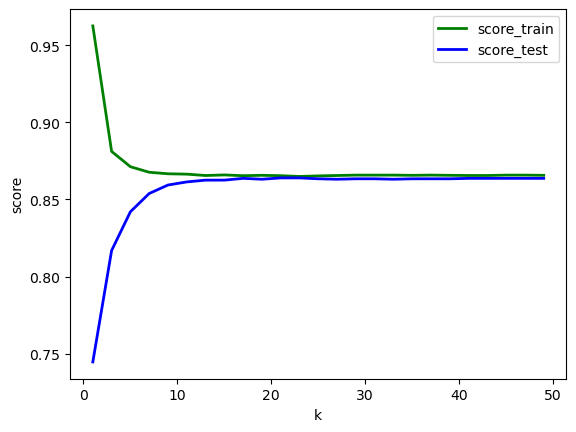

In [49]:
plt.plot(score_df['k'], score_df['score_train'], linewidth = 2, color='g', label='score_train')
plt.plot(score_df['k'], score_df['score_test'], linewidth = 2, color='b', label='score_test')

plt.xlabel('k')
plt.ylabel('score')
plt.legend(loc='best')
plt.show()

In [50]:
loo = LeaveOneOut()
score_list = []
for k in range(11, 31, 2):
  model_knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(model_knn, x_train, y_train,
                         scoring='accuracy',
                         cv=loo, n_jobs=-1)
  score_list.append([k, scores.mean()])

In [51]:
score_df = pd.DataFrame(score_list, columns=['k', 'score'])

In [52]:
score_df[score_df['score'] == score_df['score'].max()]

,k,score
8,27,0.864768
9,29,0.864768


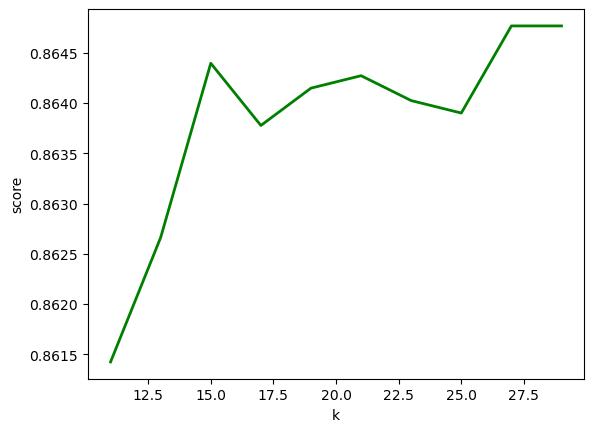

In [ ]:
plt.plot(score_df['k'], score_df['score'], linewidth=2, color='g')
plt.xlabel('k')
plt.ylabel('score')
plt.show()

In [ ]:
# проверьте качество модели с помощью матрицы сопряжённостей


In [74]:
model_knn = KNeighborsClassifier(n_neighbors=29)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [75]:
print('Точность для обучающей выборки:', model_knn.score(x_train, y_train))
print('Точность для тестовой выборки:', model_knn.score(x_test, y_test))

Точность для обучающей выборки: 0.8657585139318885
Точность для тестовой выборки: 0.8633737723859041


In [76]:
confusion_matrix(y_test, model_knn.predict(x_test))

array([[2988,    2],
       [ 471,    1]], dtype=int64)

In [77]:
confusion_matrix(y_test, model_knn.predict(x_test), normalize='all')

array([[8.63084922e-01, 5.77700751e-04],
       [1.36048527e-01, 2.88850376e-04]])

In [78]:
precision_score(y_test, model_knn.predict(x_test))

0.3333333333333333

In [79]:
recall_score(y_test, model_knn.predict(x_test))

0.00211864406779661

In [80]:
# проверьте качество модели с помощью F-мера
target_names = ['class_0', 'class_1']
y_pred = model_knn.predict(x_test)
res = classification_report(y_test, y_pred, target_names=target_names)
print(res)

              precision    recall  f1-score   support

     class_0       0.86      1.00      0.93      2990
     class_1       0.33      0.00      0.00       472

    accuracy                           0.86      3462
   macro avg       0.60      0.50      0.47      3462
weighted avg       0.79      0.86      0.80      3462



 # сделайте вывод о работе модели

   

    Так как модель не сбалансирована, то метрика accuracy не подходит для ее оценки, так как показывает лишь отношение правильных предсказаний к общему количеству.
    Судя по матрице ошибок, модель практически не предсказывает целевое действие(1), 471 FN(обьект 1 был предсказан как 0) 
    и 2 FP(0 предсказаны как 1)
    Соответственно были расчитаны  precision(0.3333) 1/3 и recall(0.0021) 1/472, иони имеют низкие показатели, так как модель, практически всех классифицирует, как тех, кто не откликнется.
    F-мера для класса 0 = 0.93, однако для класса 1 = 0, отсюда средняя F мера  =  0.47. 
    Что не является приемлемым показателем, данная модель работает на уровне среднего(как если бы мы все предсказывали 0).
    Разделение доходов по уровню(совет из видео), особого эффекта не дал(в случаях удаления колонки с абсолютной величиной дохода, метрики не меняются, либо становятся хуже, то же самое происходит и при манипуляциях с другими колонками)